In [44]:
!pip install kaggle

In [45]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = 'C:\\Users\\katic\\.kaggle'

In [46]:
!kaggle datasets download -d vanpatangan/hospital-supply-chain

Dataset URL: https://www.kaggle.com/datasets/vanpatangan/hospital-supply-chain
License(s): MIT
hospital-supply-chain.zip: Skipping, found more recently modified local copy (use --force to force download)


In [47]:
import zipfile
with zipfile.ZipFile('c:/Users/katic/Desktop/capstone_project_final/notebooks/hospital-supply-chain.zip', 'r') as zip_ref:
    zip_ref.extractall('data')

In [48]:
import pandas as pd
financial_df = pd.read_csv('data/financial_data.csv')
inventory_df = pd.read_csv('data/inventory_data.csv')
patient_df = pd.read_csv('data/patient_data.csv')

In [49]:
print(financial_df.head())


         Date Expense_Category    Amount         Description
0  2024-10-01         Staffing  29391.86      Surgical masks
1  2024-10-02         Supplies  47757.71      Surgical masks
2  2024-10-03         Supplies  43996.60         Ventilators
3  2024-10-04         Supplies  27908.42  Surgeons' salaries
4  2024-10-05        Equipment  39719.60         Ventilators


In [50]:
print(inventory_df.head())

         Date  Item_ID   Item_Type      Item_Name  Current_Stock  \
0  2024-10-01      105  Consumable     Ventilator           1542   
1  2024-10-02      100   Equipment     Ventilator           2487   
2  2024-10-03      103   Equipment  Surgical Mask           2371   
3  2024-10-04      103  Consumable  Surgical Mask           2038   
4  2024-10-05      107   Equipment        IV Drip           2410   

   Min_Required  Max_Capacity  Unit_Cost  Avg_Usage_Per_Day  \
0           264          1018    4467.55                108   
1           656          3556    5832.29                 55   
2           384          5562   16062.98                470   
3           438          1131     744.10                207   
4           338          1013   15426.53                158   

   Restock_Lead_Time Vendor_ID  
0                 17      V001  
1                 12      V001  
2                  6      V001  
3                 15      V002  
4                 12      V003  


In [51]:
print(patient_df.head())

  Patient_ID       Admission_Date       Discharge_Date Primary_Diagnosis  \
0       P001  2024-10-06 05:30:28  2024-10-23 01:11:34          Diabetes   
1       P002  2024-10-24 11:07:58  2024-10-15 05:16:54          Fracture   
2       P003  2024-10-22 21:43:43  2024-10-24 10:56:30          Fracture   
3       P004  2024-10-05 17:04:05  2024-10-30 14:10:01          Diabetes   
4       P005  2024-10-21 17:04:00  2024-10-08 15:53:22      Appendicitis   

  Procedure_Performed     Room_Type  Bed_Days Supplies_Used  Equipment_Used  \
0        Appendectomy  General Ward         2    Gloves, IV  Surgical Table   
1        Appendectomy           ICU        10      Gown, IV     MRI Machine   
2         Chest X-ray           ICU        10    Gloves, IV   X-ray Machine   
3         Chest X-ray           ICU        11    Gloves, IV   X-ray Machine   
4                 MRI           ICU         2    Gloves, IV   X-ray Machine   

        Staff_Needed  
0         2 Surgeons  
1            1 Nurse  

In [52]:
inventory_df.shape
inventory_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               500 non-null    object 
 1   Item_ID            500 non-null    int64  
 2   Item_Type          500 non-null    object 
 3   Item_Name          500 non-null    object 
 4   Current_Stock      500 non-null    int64  
 5   Min_Required       500 non-null    int64  
 6   Max_Capacity       500 non-null    int64  
 7   Unit_Cost          500 non-null    float64
 8   Avg_Usage_Per_Day  500 non-null    int64  
 9   Restock_Lead_Time  500 non-null    int64  
 10  Vendor_ID          500 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 43.1+ KB


In [53]:
patient_df.shape
patient_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Patient_ID           500 non-null    object
 1   Admission_Date       500 non-null    object
 2   Discharge_Date       500 non-null    object
 3   Primary_Diagnosis    500 non-null    object
 4   Procedure_Performed  500 non-null    object
 5   Room_Type            500 non-null    object
 6   Bed_Days             500 non-null    int64 
 7   Supplies_Used        500 non-null    object
 8   Equipment_Used       500 non-null    object
 9   Staff_Needed         500 non-null    object
dtypes: int64(1), object(9)
memory usage: 39.2+ KB


In [54]:
financial_df.shape
financial_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              500 non-null    object 
 1   Expense_Category  500 non-null    object 
 2   Amount            500 non-null    float64
 3   Description       500 non-null    object 
dtypes: float64(1), object(3)
memory usage: 15.8+ KB


In [55]:
financial_df['Date'] = pd.to_datetime(financial_df['Date'])
patient_df['Admission_Date'] = pd.to_datetime(patient_df['Admission_Date'])
patient_df['Discharge_Date'] = pd.to_datetime(patient_df['Discharge_Date'])
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'])

In [56]:
print(inventory_df.isnull().sum())
print(patient_df.isnull().sum())
print(financial_df.isnull().sum())

Date                 0
Item_ID              0
Item_Type            0
Item_Name            0
Current_Stock        0
Min_Required         0
Max_Capacity         0
Unit_Cost            0
Avg_Usage_Per_Day    0
Restock_Lead_Time    0
Vendor_ID            0
dtype: int64
Patient_ID             0
Admission_Date         0
Discharge_Date         0
Primary_Diagnosis      0
Procedure_Performed    0
Room_Type              0
Bed_Days               0
Supplies_Used          0
Equipment_Used         0
Staff_Needed           0
dtype: int64
Date                0
Expense_Category    0
Amount              0
Description         0
dtype: int64


In [57]:
inventory_df.describe()

,Date,Item_ID,Current_Stock,Min_Required,Max_Capacity,Unit_Cost,Avg_Usage_Per_Day,Restock_Lead_Time
count,500,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000
mean,2025-06-07 12:00:00,104.508000,2458.644000,485.982000,3288.834000,10277.32598,261.804000,15.116000
min,2024-10-01 00:00:00,100.000000,69.000000,10.000000,500.000000,4.23000,2.000000,1.000000
25%,2025-02-02 18:00:00,102.000000,1307.750000,215.750000,1847.750000,5422.46250,150.500000,7.000000
50%,2025-06-07 12:00:00,104.000000,2411.500000,496.500000,3311.000000,10129.96000,257.000000,16.000000
75%,2025-10-10 06:00:00,107.000000,3719.000000,734.250000,4696.000000,15206.31500,392.000000,23.000000
max,2026-02-12 00:00:00,109.000000,4976.000000,995.000000,5992.000000,19984.16000,499.000000,29.000000
std,NaN,2.865372,1390.078133,292.054772,1602.646278,5728.68441,143.983318,8.610856


In [58]:
patient_df.describe()

,Admission_Date,Discharge_Date,Bed_Days
count,500,500,500.000000
mean,2024-10-15 04:07:50.120000,2024-10-18 03:35:39.548000,7.364000
min,2024-10-01 02:53:00,2024-10-05 00:33:07,1.000000
25%,2024-10-08 04:41:18.500000,2024-10-11 09:02:29.249999872,4.000000
50%,2024-10-14 16:55:58,2024-10-18 01:32:32,7.000000
75%,2024-10-22 08:08:38.249999872,2024-10-24 13:57:23,11.000000
max,2024-10-29 22:28:36,2024-10-31 21:33:24,14.000000
std,NaN,NaN,4.079803


In [59]:
financial_df.describe()

,Date,Amount
count,500,500.000000
mean,2025-06-07 12:00:00,24720.491460
min,2024-10-01 00:00:00,1110.270000
25%,2025-02-02 18:00:00,13213.532500
50%,2025-06-07 12:00:00,24028.275000
75%,2025-10-10 06:00:00,36010.815000
max,2026-02-12 00:00:00,49581.160000
std,NaN,13731.361055


In [60]:
inventory_df['Item_Name'] = inventory_df['Item_Name'].astype('category')
financial_df['Description'] = financial_df['Description'].astype('category')

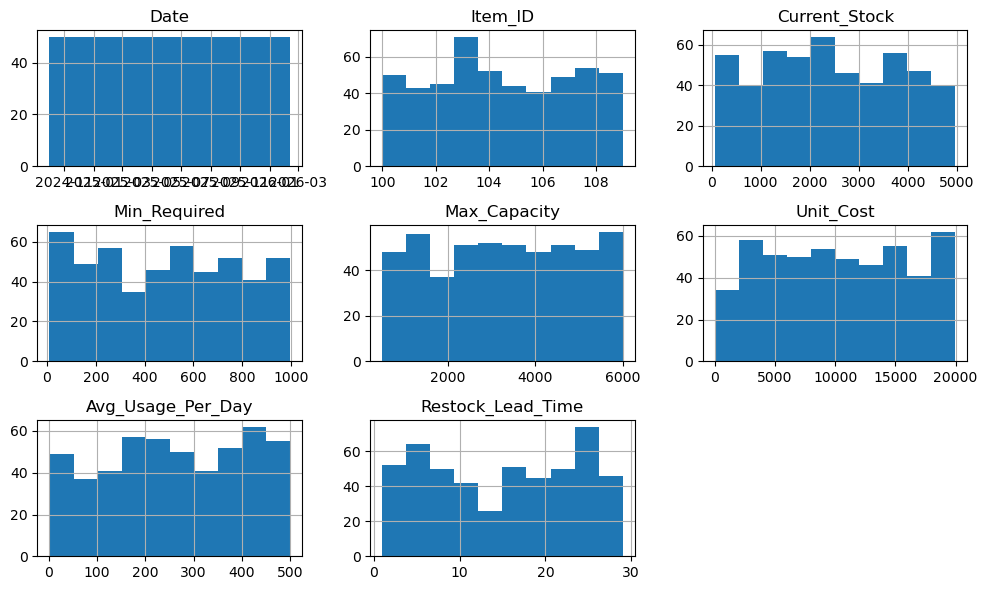

In [61]:
import matplotlib.pyplot as plt
inventory_df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()


Item_ID              0.000212
Current_Stock        0.071542
Min_Required         1.000000
Max_Capacity        -0.069109
Unit_Cost            0.031728
Avg_Usage_Per_Day    0.042654
Restock_Lead_Time    0.081876
Name: Min_Required, dtype: float64


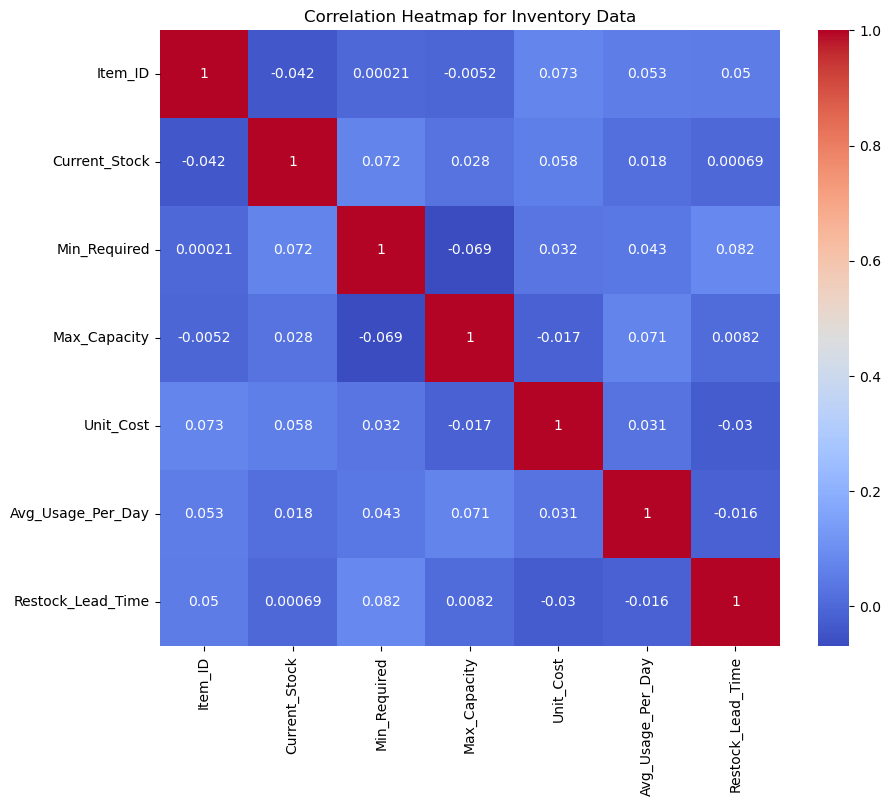

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numeric_inventory_df = inventory_df.select_dtypes(include=[np.number])
correlation_matrix = numeric_inventory_df.corr()
print(correlation_matrix['Min_Required'])
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_inventory_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap for Inventory Data')
plt.show()

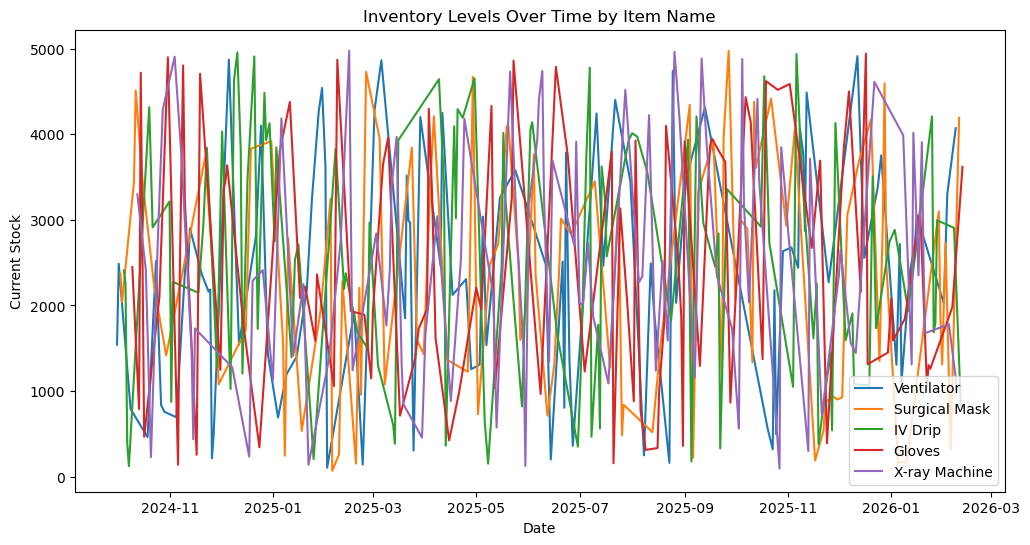

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# Loop over each unique item name in the inventory data
for item_name in inventory_df['Item_Name'].unique():
    subset = inventory_df[inventory_df['Item_Name'] == item_name]
    plt.plot(subset['Date'], subset['Current_Stock'], label=item_name)

plt.xlabel('Date')
plt.ylabel('Current Stock')
plt.title('Inventory Levels Over Time by Item Name')
plt.legend()
plt.show()

C:\Users\katic\AppData\Local\Temp\ipykernel_7180\1069320620.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bar_data = inventory_df.groupby(['Date', 'Item_Name'])['Current_Stock'].mean().unstack()


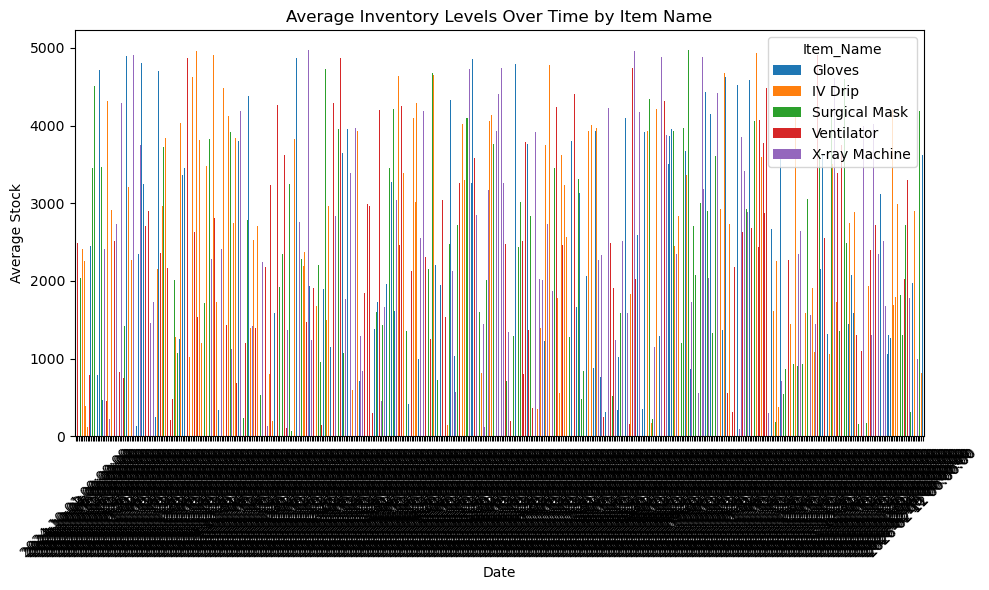

In [86]:
import matplotlib.pyplot as plt

# Group by Date and Item_Name, then calculate average stock level
bar_data = inventory_df.groupby(['Date', 'Item_Name'])['Current_Stock'].mean().unstack()

# Plot the bar plot
bar_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Average Inventory Levels Over Time by Item Name')
plt.xlabel('Date')
plt.ylabel('Average Stock')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


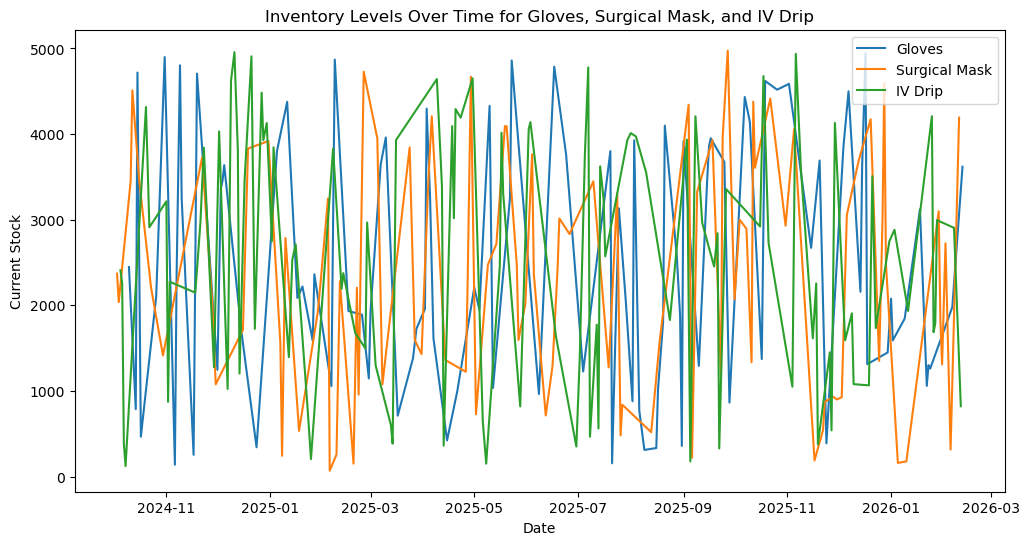

In [64]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

# List of items to plot
items_to_plot = ['Gloves', 'Surgical Mask', 'IV Drip']

# Filter the data for the specified items
for item_name in items_to_plot:
    subset = inventory_df[inventory_df['Item_Name'] == item_name]
    plt.plot(subset['Date'], subset['Current_Stock'], label=item_name)

plt.xlabel('Date')
plt.ylabel('Current Stock')
plt.title('Inventory Levels Over Time for Gloves, Surgical Mask, and IV Drip')
plt.legend()
plt.show()


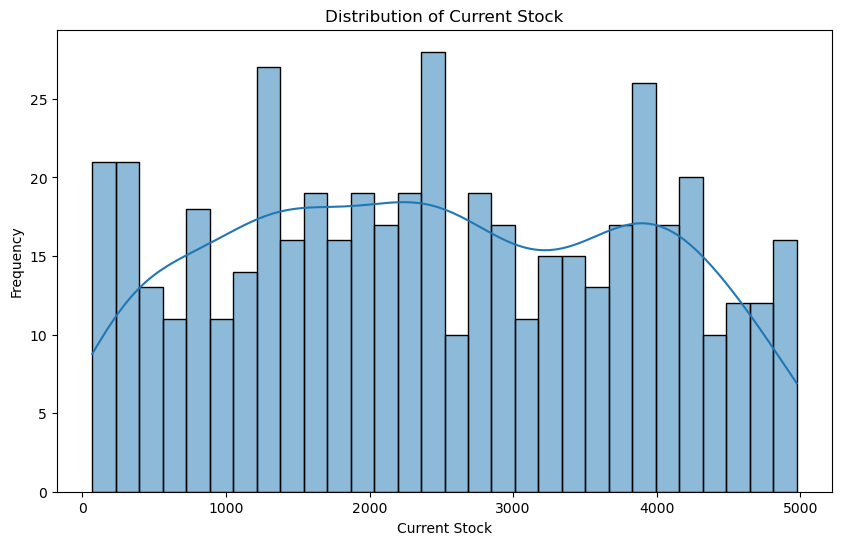

In [87]:
plt.figure(figsize=(10, 6))
sns.histplot(inventory_df['Current_Stock'], bins=30, kde=True)
plt.title('Distribution of Current Stock')
plt.xlabel('Current Stock')
plt.ylabel('Frequency')
plt.show()


C:\Users\katic\AppData\Local\Temp\ipykernel_7180\229522670.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  item_grouped = inventory_df.groupby('Item_Name')[['Current_Stock', 'Min_Required']].mean()


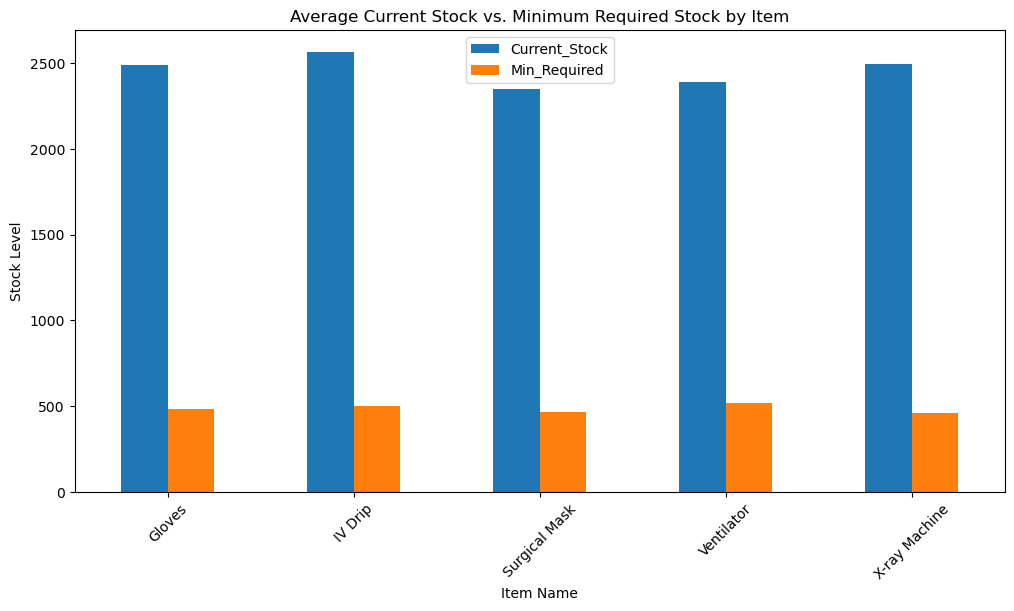

In [66]:
# Group by Item_Name and calculate average current stock and minimum required stock
item_grouped = inventory_df.groupby('Item_Name')[['Current_Stock', 'Min_Required']].mean()

item_grouped.plot(kind='bar', figsize=(12, 6))
plt.title('Average Current Stock vs. Minimum Required Stock by Item')
plt.xlabel('Item Name')
plt.ylabel('Stock Level')
plt.xticks(rotation=45)
plt.show()


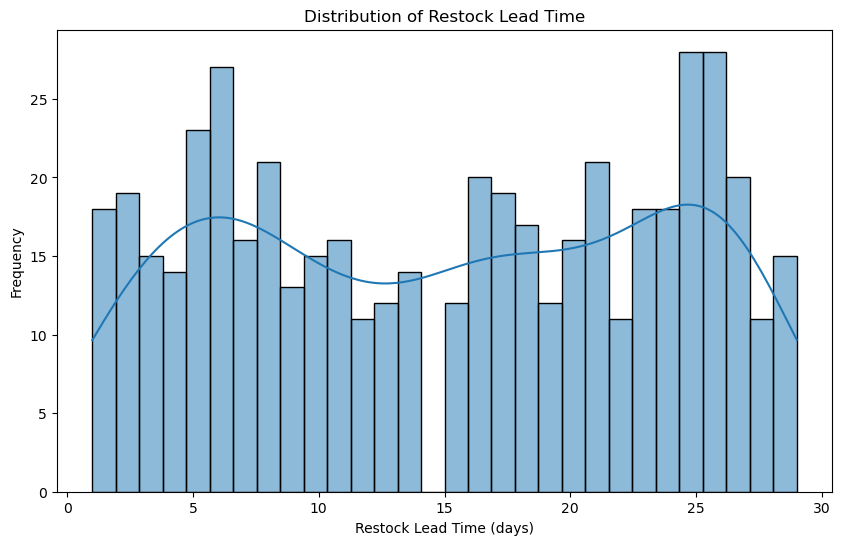

In [88]:
plt.figure(figsize=(10, 6))
sns.histplot(inventory_df['Restock_Lead_Time'], bins=30, kde=True)
plt.title('Distribution of Restock Lead Time')
plt.xlabel('Restock Lead Time (days)')
plt.ylabel('Frequency')
plt.show()


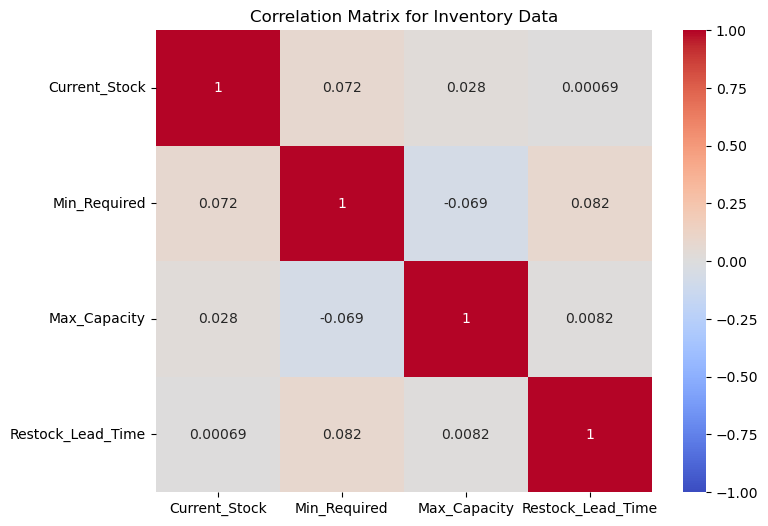

In [68]:
corr_matrix = inventory_df[['Current_Stock', 'Min_Required', 'Max_Capacity', 'Restock_Lead_Time']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix for Inventory Data')
plt.show()


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


# capture linearity of 'Min_Required' with 'Date'
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'])
inventory_df['Days_since_start'] = (inventory_df['Date'] - inventory_df['Date'].min()).dt.days

X = inventory_df[['Days_since_start']]  
y = inventory_df['Min_Required']      

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r_squared = model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)

print(f'R-squared: {r_squared}')
print(f'Mean Squared Error: {mse}')




R-squared: 0.0050855104244824645
Mean Squared Error: 78625.04558349462


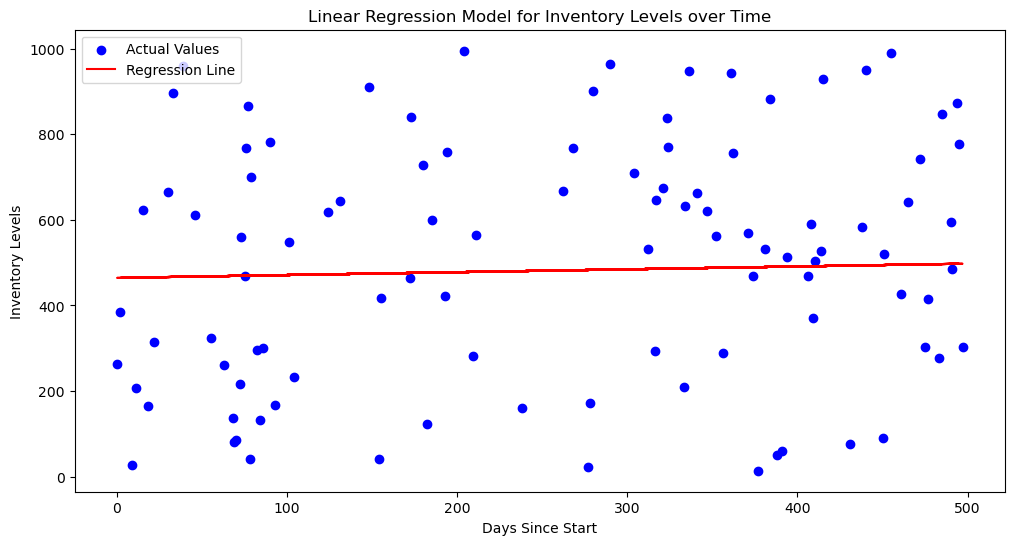

In [ ]:

plt.figure(figsize=(12, 6))

# Plot actual values vs predicted
plt.scatter(X_test, y_test, color='blue', label='Actual Values')

plt.plot(X_test, y_pred, color='red', label='Regression Line')

plt.xlabel('Days Since Start')
plt.ylabel('Inventory Levels')
plt.title('Linear Regression Model for Inventory Levels over Time')
plt.legend()

plt.show()

In [101]:


# Aggregate data by Year and Quarter
inventory_df['Year'] = inventory_df['Date'].dt.year
inventory_df['Quarter'] = inventory_df['Date'].dt.to_period('Q')

quarterly_data = inventory_df.groupby(['Year', 'Quarter', 'Item_Name']).agg({
    'Min_Required': 'sum'  
}).reset_index()

print(quarterly_data)


    Year Quarter      Item_Name  Min_Required
0   2024  2024Q4         Gloves          7347
1   2024  2024Q4        IV Drip         11086
2   2024  2024Q4  Surgical Mask          6032
3   2024  2024Q4     Ventilator         11145
4   2024  2024Q4  X-ray Machine          3899
..   ...     ...            ...           ...
85  2026  2026Q1         Gloves          4536
86  2026  2026Q1        IV Drip          3837
87  2026  2026Q1  Surgical Mask          4517
88  2026  2026Q1     Ventilator          5138
89  2026  2026Q1  X-ray Machine          3946

[90 rows x 4 columns]


C:\Users\katic\AppData\Local\Temp\ipykernel_7180\2399737210.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  quarterly_data = inventory_df.groupby(['Year', 'Quarter', 'Item_Name']).agg({


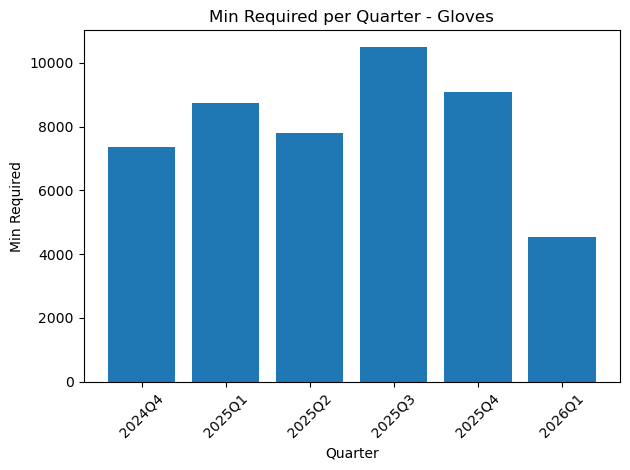

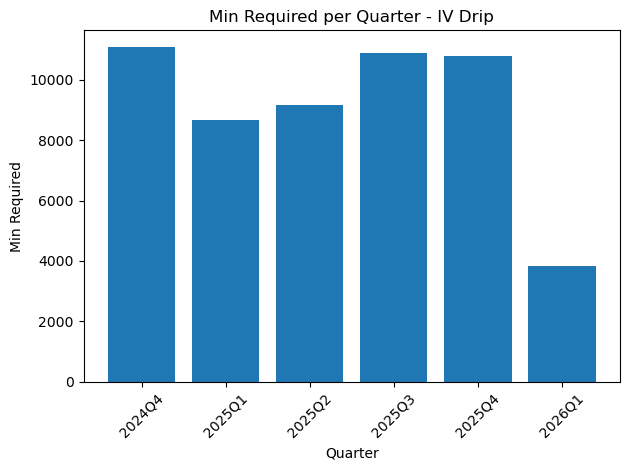

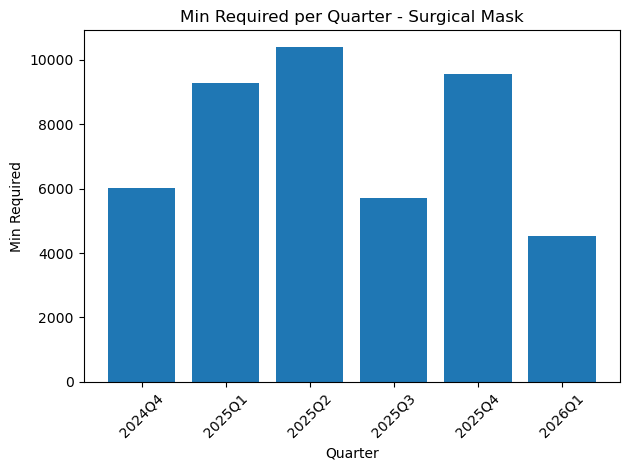

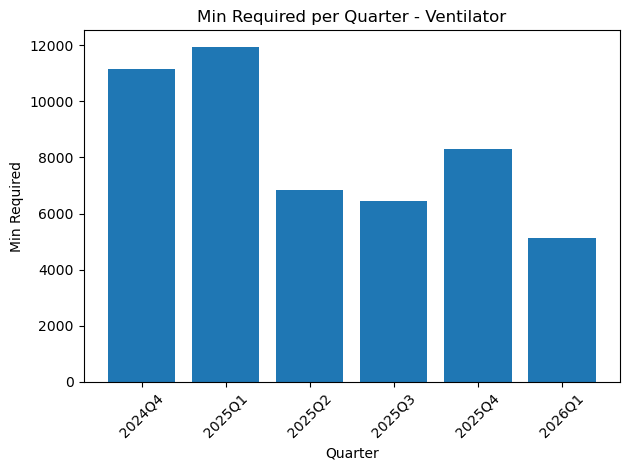

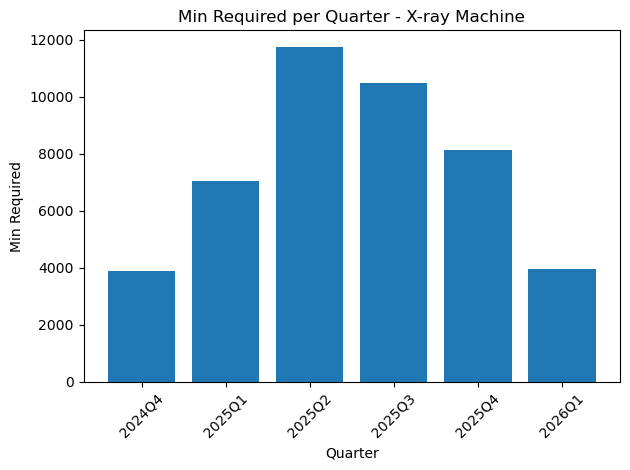

In [102]:
import matplotlib.pyplot as plt

quarterly_data['Quarter'] = quarterly_data['Quarter'].astype(str)
for item in quarterly_data['Item_Name'].unique():
    data = quarterly_data[quarterly_data['Item_Name'] == item]
    
    plt.figure()
    plt.bar(data['Quarter'], data['Min_Required'])
    plt.title(f'Min Required per Quarter - {item}')
    plt.xlabel('Quarter')
    plt.ylabel('Min Required')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# RandomForestRegression

X = inventory_df[['Current_Stock', 'Avg_Usage_Per_Day', 'Restock_Lead_Time']]  
y = inventory_df['Min_Required'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')





Mean Absolute Error: 277.37440000000004
Mean Squared Error: 103885.21118799999


In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'], 
}

X = inventory_df[['Current_Stock', 'Avg_Usage_Per_Day', 'Restock_Lead_Time']]  
y = inventory_df['Min_Required']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train_scaled, y_train)
best_params = grid_search.best_params_
print(f"Best Parameters: {best_params}")

# Best model with the best parameters
best_rf_model = grid_search.best_estimator_

# Predict with the best model
y_pred_tuned = best_rf_model.predict(X_test_scaled)

# Evaluate the tuned model
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f"Tuned Mean Absolute Error: {mae_tuned}")
print(f"Tuned Mean Squared Error: {mse_tuned}")




Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Tuned Mean Absolute Error: 257.4762880079546
Tuned Mean Squared Error: 89769.58618517978


c:\Users\katic\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:540: FitFailedWarning: 
540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
256 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\katic\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\katic\anaconda3\Lib\site-packages\sklearn\base.py", line 1466, in wrapper
    estimator._validate_params()
  File "c:\Users\katic\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "c:\Users\katic\anaconda3\Lib\site-packa

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

# Try the Random Forest model with the best parameters
X = inventory_df[['Current_Stock', 'Avg_Usage_Per_Day', 'Restock_Lead_Time']]  
y = inventory_df['Min_Required']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


best_rf_model = RandomForestRegressor(
    n_estimators=100,      
    max_depth=10,           
    min_samples_split=2,    
    min_samples_leaf=4,     
    max_features='sqrt',   
    random_state=42
)

best_rf_model.fit(X_train_scaled, y_train)
y_pred_tuned = best_rf_model.predict(X_test_scaled)
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f"Tuned Mean Absolute Error: {mae_tuned}")
print(f"Tuned Mean Squared Error: {mse_tuned}")



Tuned Mean Absolute Error: 257.4762880079546
Tuned Mean Squared Error: 89769.58618517978


In [111]:
import pandas as pd
import matplotlib.pyplot as plt

# Get the feature importances from the model
feature_importances = best_rf_model.feature_importances_

feature_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_df = feature_df.sort_values(by='Importance', ascending=False)
print(feature_df)



             Feature  Importance
1  Avg_Usage_Per_Day    0.411117
0      Current_Stock    0.327253
2  Restock_Lead_Time    0.261630


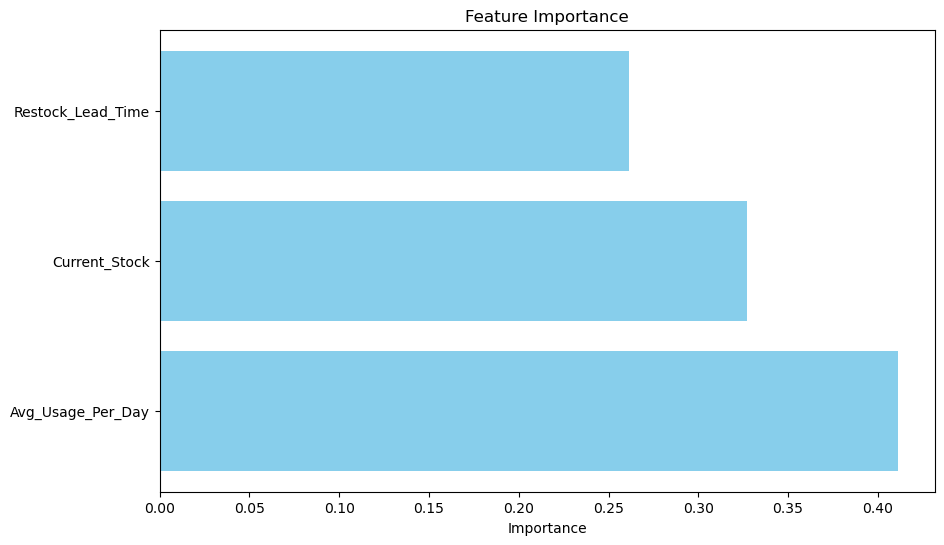

In [110]:
# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_df['Feature'], feature_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importance')
plt.show()


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler


X = inventory_df[['Current_Stock', 'Avg_Usage_Per_Day']]  
y = inventory_df['Min_Required']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=100,       
    max_depth=10,           
    min_samples_split=2,    
    min_samples_leaf=4,     
    max_features='sqrt',    
    random_state=42
)

best_rf_model.fit(X_train_scaled, y_train)
y_pred_tuned = best_rf_model.predict(X_test_scaled)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f"Tuned Mean Absolute Error: {mae_tuned}")
print(f"Tuned Mean Squared Error: {mse_tuned}")

Tuned Mean Absolute Error: 263.4239525034827
Tuned Mean Squared Error: 92344.35384464191


In [113]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

X = inventory_df[['Avg_Usage_Per_Day']]  
y = inventory_df['Min_Required']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model with the best parameters
best_rf_model = RandomForestRegressor(
    n_estimators=100,       
    max_depth=10,           
    min_samples_split=2,    
    min_samples_leaf=4,     
    max_features='sqrt',    
    random_state=42
)

best_rf_model.fit(X_train_scaled, y_train)
y_pred_tuned = best_rf_model.predict(X_test_scaled)

mae_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)

print(f"Tuned Mean Absolute Error: {mae_tuned}")
print(f"Tuned Mean Squared Error: {mse_tuned}")

Tuned Mean Absolute Error: 263.4239525034827
Tuned Mean Squared Error: 92344.35384464191


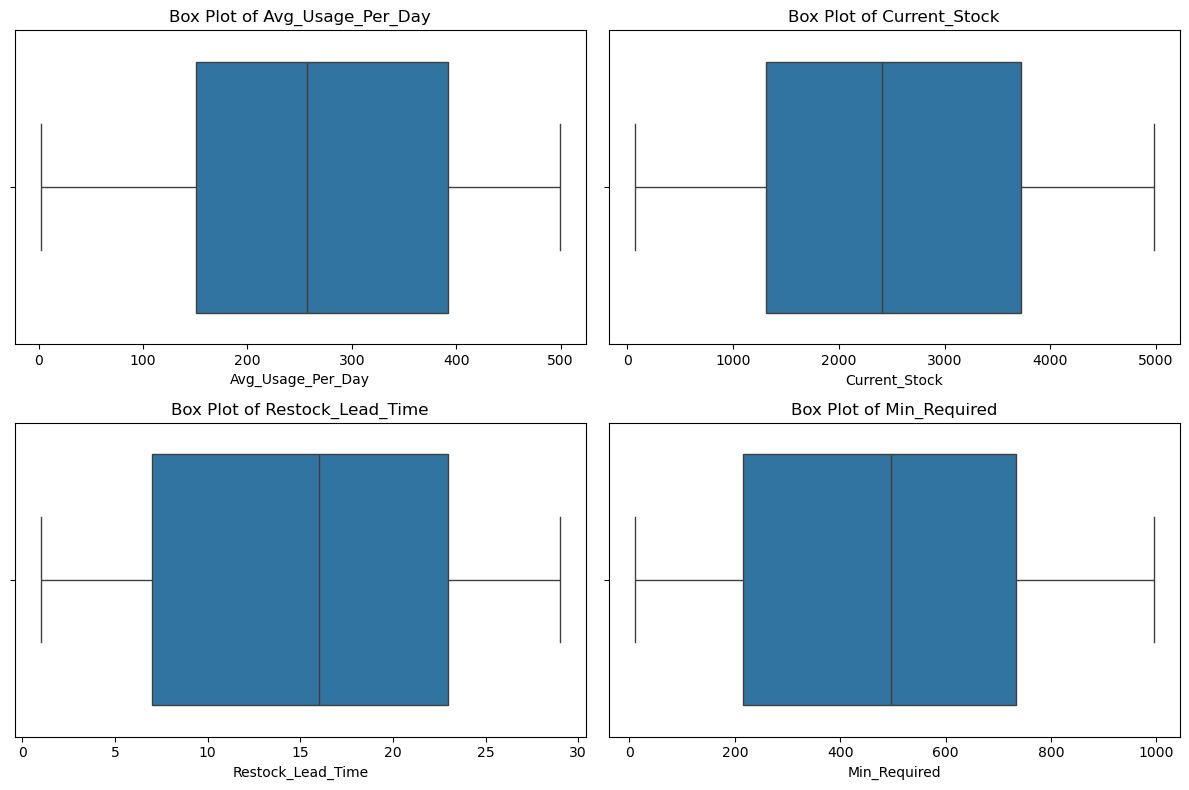

In [115]:
import seaborn as sns
import matplotlib.pyplot as plt

# Features to check for outliers
features = ['Avg_Usage_Per_Day', 'Current_Stock', 'Restock_Lead_Time', 'Min_Required']

plt.figure(figsize=(12, 8))
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.boxplot(x=inventory_df[feature])
    plt.title(f'Box Plot of {feature}')
plt.tight_layout()
plt.show()


In [116]:
from scipy.stats import zscore

# Identify outliers where the absolute Z-score is greater than 3
z_scores = inventory_df[features].apply(zscore)
outliers = (abs(z_scores) > 3).any(axis=1)
outlier_data = inventory_df[outliers]
print(f"Outliers detected: {len(outlier_data)} rows")
print(outlier_data)

Outliers detected: 0 rows
Empty DataFrame
Columns: [Date, Item_ID, Item_Type, Item_Name, Current_Stock, Min_Required, Max_Capacity, Unit_Cost, Avg_Usage_Per_Day, Restock_Lead_Time, Vendor_ID, Days_since_start, Year, Quarter, Month]
Index: []


In [117]:

items_to_train = ['Gloves', 'Surgical Mask', 'IV Drip']

# Train a model for for: Gloves, Surgical Mask, IV Drip
for item in items_to_train:
   
    item_data = inventory_df[inventory_df['Item_Name'] == item]
    
    X_item = item_data[['Avg_Usage_Per_Day', 'Current_Stock', 'Restock_Lead_Time']]
    y_item = item_data['Min_Required']
    
    # Train-Test Split
    X_train, X_test, y_train, y_test = train_test_split(X_item, y_item, test_size=0.2, random_state=42)
    
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    print(f"Item: {item}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
    print('-' * 30)


Item: Gloves
Mean Absolute Error: 232.52700000000004
Mean Squared Error: 81285.14973000002
------------------------------
Item: Surgical Mask
Mean Absolute Error: 275.22200000000004
Mean Squared Error: 115274.81007
------------------------------
Item: IV Drip
Mean Absolute Error: 251.20318181818178
Mean Squared Error: 82928.76230454545
------------------------------


In [120]:
import pandas as pd

# Group by Year and Month and aggregate data for each item (mean)
inventory_df['Date'] = pd.to_datetime(inventory_df['Date'])

inventory_df['Month'] = inventory_df['Date'].dt.month
inventory_df['Year'] = inventory_df['Date'].dt.year

items_to_aggregate = ['Gloves', 'Surgical Mask', 'IV Drip']

aggregated_data = {}

for item in items_to_aggregate:

    item_data = inventory_df[inventory_df['Item_Name'] == item]
    
    
    monthly_data = item_data.groupby(['Year', 'Month']).agg({
        'Avg_Usage_Per_Day': 'mean',
        'Current_Stock': 'mean',
        'Restock_Lead_Time': 'mean',
        'Min_Required': 'mean'
    }).reset_index()

    aggregated_data[item] = monthly_data

    print(f"Aggregated Data for {item}:")
    print(monthly_data.head())
  


Aggregated Data for Gloves:
   Year  Month  Avg_Usage_Per_Day  Current_Stock  Restock_Lead_Time  \
0  2024     10         242.166667    2570.333333          17.666667   
1  2024     11         203.500000    2581.500000          17.000000   
2  2024     12         317.166667    2293.166667          23.833333   
3  2025      1         238.500000    2739.166667          11.500000   
4  2025      2         149.200000    2179.800000           8.200000   

   Min_Required  
0    390.666667  
1    442.833333  
2    391.000000  
3    669.666667  
4    340.000000  
Aggregated Data for Surgical Mask:
   Year  Month  Avg_Usage_Per_Day  Current_Stock  Restock_Lead_Time  \
0  2024     10         287.000000    2779.428571          12.142857   
1  2024     11         301.333333    2274.666667          17.666667   
2  2024     12         354.666667    3155.000000          22.000000   
3  2025      1         161.166667    1564.666667          11.000000   
4  2025      2         320.250000    1737.75000

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

models_results = {}

for item in items_to_aggregate:
  
    item_data = aggregated_data[item]
  
    X_item = item_data[['Avg_Usage_Per_Day', 'Current_Stock', 'Restock_Lead_Time']]
    y_item = item_data['Min_Required']
   
    X_train, X_test, y_train, y_test = train_test_split(X_item, y_item, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
   
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    models_results[item] = {
        'Model': model,
        'MAE': mae,
        'MSE': mse
    }

    print(f"Item: {item}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
   


Item: Gloves
Mean Absolute Error: 106.68485768398249
Mean Squared Error: 16094.8805049453
Item: Surgical Mask
Mean Absolute Error: 126.9865476190476
Mean Squared Error: 22861.833819191117
Item: IV Drip
Mean Absolute Error: 57.291420634920414
Mean Squared Error: 6669.760768386259


In [129]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# use of previous months' data 
X = aggregated_data['Gloves'][['Year', 'Month', 'Avg_Usage_Per_Day', 'Current_Stock', 'Restock_Lead_Time']]  
y = aggregated_data['Gloves']['Min_Required']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")

next_month_data = pd.DataFrame({
    'Year': [2027],  
    'Month': [7], 
    'Avg_Usage_Per_Day': [10],  
    'Current_Stock': [100],  
    'Restock_Lead_Time': [5]
})

# Predict the minimum required for next month
next_month_prediction = model.predict(next_month_data)
print(f"Predicted Minimum Required for Next Month: {next_month_prediction[0]}")


Mean Absolute Error: 88.58815584415571
Mean Squared Error: 11413.828268945572
Predicted Minimum Required for Next Month: 419.06333333333356


In [130]:
# Create and try with a 'Quarter' column 
inventory_df['Quarter'] = inventory_df['Date'].dt.to_period('Q')

items_to_aggregate = ['Gloves', 'Surgical Mask', 'IV Drip']


aggregated_data_quarterly = {}

for item in items_to_aggregate:

    item_data = inventory_df[inventory_df['Item_Name'] == item]
    
    quarterly_data = item_data.groupby(['Year', 'Quarter']).agg({
        'Avg_Usage_Per_Day': 'mean',
        'Current_Stock': 'mean',
        'Restock_Lead_Time': 'mean',
        'Min_Required': 'mean'
    }).reset_index()

    aggregated_data_quarterly[item] = quarterly_data

    print(f"Aggregated Quarterly Data for {item}:")
    print(quarterly_data.head())



Aggregated Quarterly Data for Gloves:
   Year Quarter  Avg_Usage_Per_Day  Current_Stock  Restock_Lead_Time  \
0  2024  2024Q4         254.277778    2481.666667          19.500000   
1  2025  2025Q1         215.529412    2394.000000          12.176471   
2  2025  2025Q2         276.266667    2647.866667          21.400000   
3  2025  2025Q3         272.125000    2128.791667          16.000000   
4  2025  2025Q4         299.062500    3266.875000          12.625000   

   Min_Required  
0    408.166667  
1    514.000000  
2    519.200000  
3    437.166667  
4    568.687500  
Aggregated Quarterly Data for Surgical Mask:
   Year Quarter  Avg_Usage_Per_Day  Current_Stock  Restock_Lead_Time  \
0  2024  2024Q4         305.923077    2749.615385          15.692308   
1  2025  2025Q1         256.789474    1852.000000          11.578947   
2  2025  2025Q2         251.904762    2557.190476          16.809524   
3  2025  2025Q3         274.666667    2407.733333          14.266667   
4  2025  2025Q4 

In [ ]:
# train the model using the quarterly data
models_results_quarterly = {}

for item in items_to_aggregate:
    
    item_data = aggregated_data_quarterly[item]
    
    X_item = item_data[['Avg_Usage_Per_Day', 'Current_Stock', 'Restock_Lead_Time']]
    y_item = item_data['Min_Required']
    
    X_train, X_test, y_train, y_test = train_test_split(X_item, y_item, test_size=0.2, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    
    models_results_quarterly[item] = {
        'Model': model,
        'MAE': mae,
        'MSE': mse
    }

    # Print mae and mse for each item
    print(f"Item: {item}")
    print(f"Mean Absolute Error: {mae}")
    print(f"Mean Squared Error: {mse}")
   



Item: Gloves
Mean Absolute Error: 40.22058333333334
Mean Squared Error: 1955.0680330919984
Item: Surgical Mask
Mean Absolute Error: 11.44356672932338
Mean Squared Error: 164.70390847184268
Item: IV Drip
Mean Absolute Error: 42.21200710667071
Mean Squared Error: 1809.443687405656
